In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [2]:
plt.style.use(['science', 'ieee'])

In [3]:
# Let W_t be a standard Wiener Process, that is the drift parameter is zero and the Variance parameter 𝜎2 = 1.
# Suppose that we divide the interval [0,2] into L subintervals [t_i, t_{i+1}] , with 𝑡𝑖 = 𝑖𝛿𝑡 and 𝛿𝑡 = 2/𝐿
# Let 𝑊𝑖 = 𝑊(𝑡𝑖 ) 𝑎𝑛𝑑 𝛿𝑊𝑖 = 𝑊𝑖+1 − 𝑊𝑖. Verify numerically that
# a) sum_{i=0}^{L-1} |𝛿𝑊𝑖| is unbounded as 𝛿t goes to zero.
# b) sum_{i=0}^{L-1} 𝛿𝑊𝑖^2 converges to 2 in probability as 𝛿t goes to zero.

# Parameters
L = 50000
delta_t = 2 / L
t = np.linspace(0, 2, L + 1)
W = np.zeros(L + 1)
dW = np.zeros(L)
for i in range(L):
    dW[i] = np.random.normal(0, np.sqrt(delta_t))
    W[i + 1] = W[i] + dW[i]
    
# a) sum_{i=0}^{L-1} |𝛿𝑊𝑖| is unbounded as 𝛿t goes to zero.
print(f"Sum of |dW|: {np.sum(np.abs(dW))}")

# b) sum_{i=0}^{L-1} 𝛿𝑊𝑖^2 converges to 2 in probability as 𝛿t goes to zero.
print(f"Sum of dW^2: {np.sum(dW**2)}")

Sum of |dW|: 252.28334836425816
Sum of dW^2: 1.9924231031156292


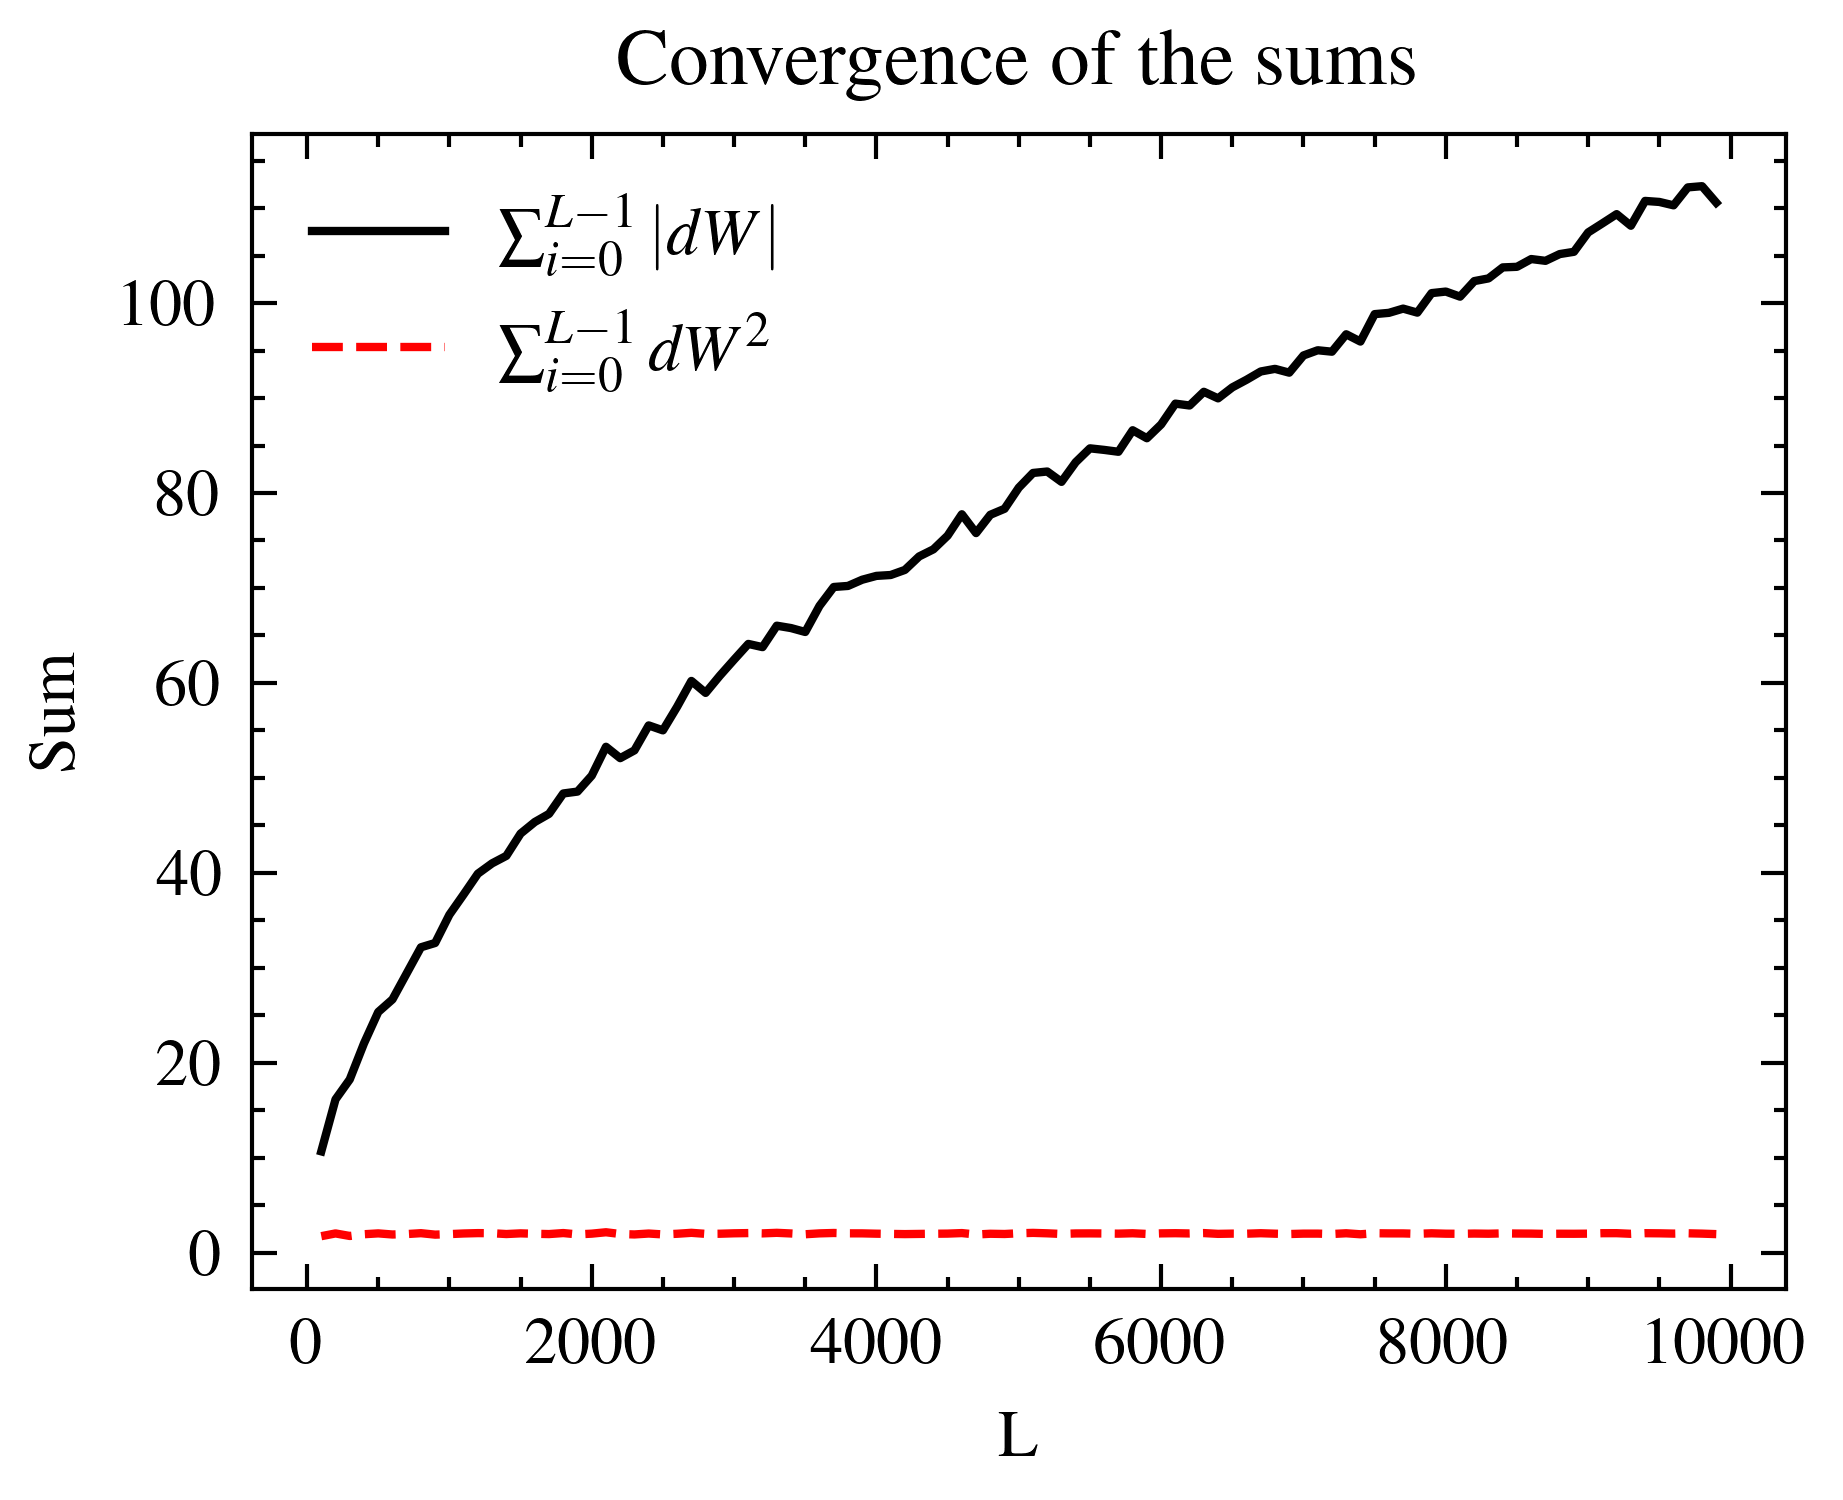

In [4]:
# Convergence plot of L
L = np.arange(100, 10000, 100)
sum_dW = np.zeros(len(L))
sum_dW2 = np.zeros(len(L))

for i in range(len(L)):
    delta_t = 2 / L[i]
    t = np.linspace(0, 2, L[i] + 1)
    W = np.zeros(L[i] + 1)
    dW = np.zeros(L[i])
    for j in range(L[i]):
        dW[j] = np.random.normal(0, np.sqrt(delta_t))
        W[j + 1] = W[j] + dW[j]
    sum_dW[i] = np.sum(np.abs(dW))
    sum_dW2[i] = np.sum(dW**2)
    
plt.figure()
plt.plot(L, sum_dW, label=r"$\sum_{i=0}^{L-1} |dW|$")
plt.plot(L, sum_dW2, label=r"$\sum_{i=0}^{L-1} dW^2$")
plt.xlabel("L")
plt.legend()
plt.ylabel("Sum")
plt.title("Convergence of the sums")
plt.show()

In [5]:
# Evaluate numerically the stochastic integrals
# a) It𝑜̂ ∫ 𝑊(𝑡)𝑑𝑊(𝑡) on the interval [0,2]

# Parameters
L = 500000
delta_t = 2 / L
t = np.linspace(0, 2, L + 1)
W = np.zeros(L + 1)
dW = np.zeros(L)
for i in range(L):
    dW[i] = np.random.normal(0, np.sqrt(delta_t))
    W[i + 1] = W[i] + dW[i]
    
# a) It𝑜̂ ∫ 𝑊(𝑡)𝑑𝑊(𝑡) on the interval [0,2]
integral = np.sum(W[:-1] * dW)
# Note that the integral is a random variable, so it will change every time we run the code
print(f"Integral: {integral}")

Integral: -0.9945395831308367


In [6]:
# b) Stratonovich ∫ 𝑊(𝑡) ∘ 𝑑𝑊(𝑡) on the interval [0,2]

# Parameters
L = 500000
delta_t = 2 / L
t = np.linspace(0, 2, L + 1)
W = np.zeros(L + 1)
dW = np.zeros(L)
for i in range(L):
    dW[i] = np.random.normal(0, np.sqrt(delta_t))
    W[i + 1] = W[i] + dW[i]
    
# b) Stratonovich ∫ 𝑊(𝑡) ∘ 𝑑𝑊(𝑡) on the interval [0,2]
integral = np.sum((W[:-1] + W[1:]) / 2 * dW)
print(f"Integral: {integral}")

Integral: 0.24407594792932663


In [7]:
# E[∫ 𝑊(𝑡)𝑑𝑊(𝑡)] on the interval [0,2]

# Parameters
L = 500000
delta_t = 2 / L
t = np.linspace(0, 2, L + 1)
W = np.zeros(L + 1)
dW = np.zeros(L)
for i in range(L):
    dW[i] = np.random.normal(0, np.sqrt(delta_t))
    W[i + 1] = W[i] + dW[i]
    
# E[∫ 𝑊(𝑡)𝑑𝑊(𝑡)] on the interval [0,2]
n = 1000
expected_value = np.zeros(n)
for i in range(n):
    dW = np.random.normal(0, np.sqrt(delta_t), L)
    expected_value[i] = np.sum(W[:-1] * dW)
print(f"Expected value: {np.mean(expected_value)}")

Expected value: 0.0030771518896662276


In [8]:
# E[∫ 𝑊(𝑡)𝑑𝑊(𝑡)]^2 on the interval [0,2]

# Parameters
L = 500000
delta_t = 2 / L
t = np.linspace(0, 2, L + 1)
W = np.zeros(L + 1)
dW = np.zeros(L)
for i in range(L):
    dW[i] = np.random.normal(0, np.sqrt(delta_t))
    W[i + 1] = W[i] + dW[i]
    
# E[∫ 𝑊(𝑡)𝑑𝑊(𝑡)]^2 on the interval [0,2]
n = 1000
expected_value = np.zeros(n)
for i in range(n):
    dW = np.random.normal(0, np.sqrt(delta_t), L)
    expected_value[i] = np.sum(W[:-1] * dW)**2
print(f"Expected value: {np.mean(expected_value)}")

Expected value: 1.7312625705112301


In [9]:
# E[∫ 𝑊(𝑡)^2𝑑𝑊(𝑡)] on the interval [0,2]

# Parameters
L = 500000
delta_t = 2 / L
t = np.linspace(0, 2, L + 1)
W = np.zeros(L + 1)
dW = np.zeros(L)
for i in range(L):
    dW[i] = np.random.normal(0, np.sqrt(delta_t))
    W[i + 1] = W[i] + dW[i]
    
# E[∫ 𝑊(𝑡)^2𝑑𝑊(𝑡)] on the interval [0,2]
n = 1000
expected_value = np.zeros(n)
for i in range(n):
    dW = np.random.normal(0, np.sqrt(delta_t), L)
    expected_value[i] = np.sum(W[:-1]**2 * dW)
print(f"Expected value: {np.mean(expected_value)}")

Expected value: -0.02759162794921994


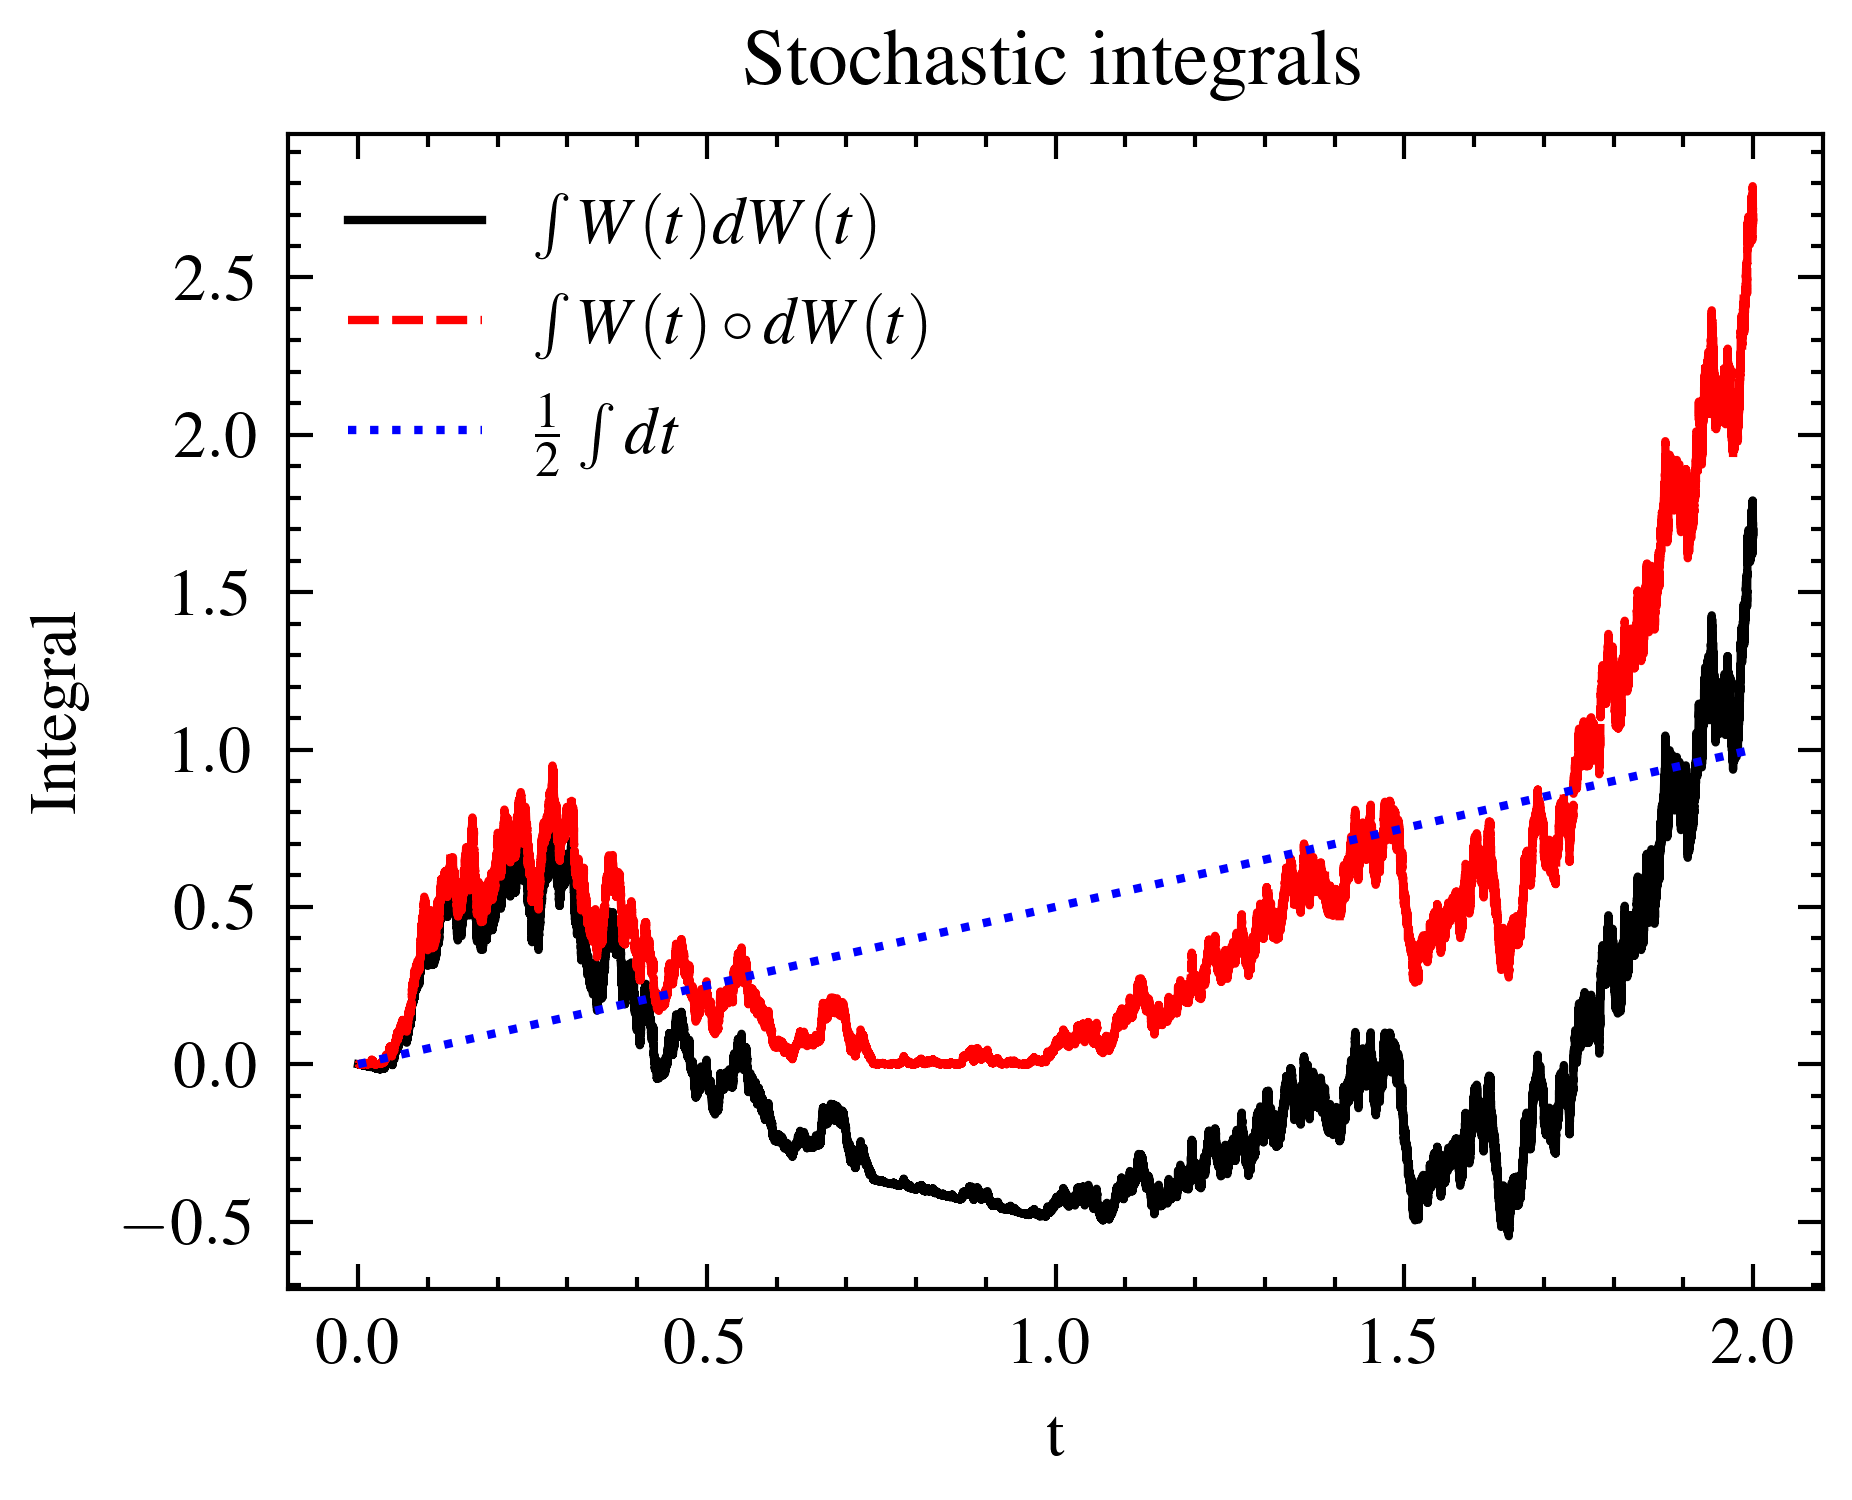

In [10]:
# For 𝑡 ∈ [0,2] evaluate ∫ 𝑊(𝑡)𝑑𝑊(𝑡) in the range [0,t], ∫ 𝑊(𝑡) ∘ 𝑑𝑊(𝑡) in the range [0,t] and 1/2 ∫ 𝑑𝑡 in the range [0,t]. What do you observe
 
# Parameters
L = 500000
delta_t = 2 / L
t = np.linspace(0, 2, L + 1)
W = np.zeros(L + 1)
dW = np.zeros(L)
for i in range(L):
    dW[i] = np.random.normal(0, np.sqrt(delta_t))
    W[i + 1] = W[i] + dW[i]
    
# For 𝑡 ∈ [0,2] evaluate ∫ 𝑊(𝑡)𝑑𝑊(𝑡) in the range [0,t], ∫ 𝑊(𝑡) ∘ 𝑑𝑊(𝑡) in the range [0,t] and 1/2 ∫ 𝑑𝑡 in the range [0,t]. What do you observe
plt.figure()
# plt.plot(t, np.cumsum(W[:-1] * dW)) ValueError: x and y must have same first dimension, but have shapes (500001,) and (500000,)
# plt.plot(t, np.cumsum((W[:-1] + W[1:]) / 2 * dW))
# plt.plot(t, t / 2)
plt.plot(t[:-1], np.cumsum(W[:-1] * dW))
plt.plot(t[:-1], np.cumsum((W[:-1] + W[1:]) / 2 * dW))
plt.plot(t[:-1], t[:-1] / 2)
plt.xlabel("t")
plt.ylabel("Integral")
plt.title("Stochastic integrals")
plt.legend([r"$\int W(t)dW(t)$", r"$\int W(t) \circ dW(t)$", r"$\frac{1}{2}\int dt$"])
plt.show()


Expected value: 8.621627719127794
Computed value: 8.062392795165977
Error: 0.5592349239618173


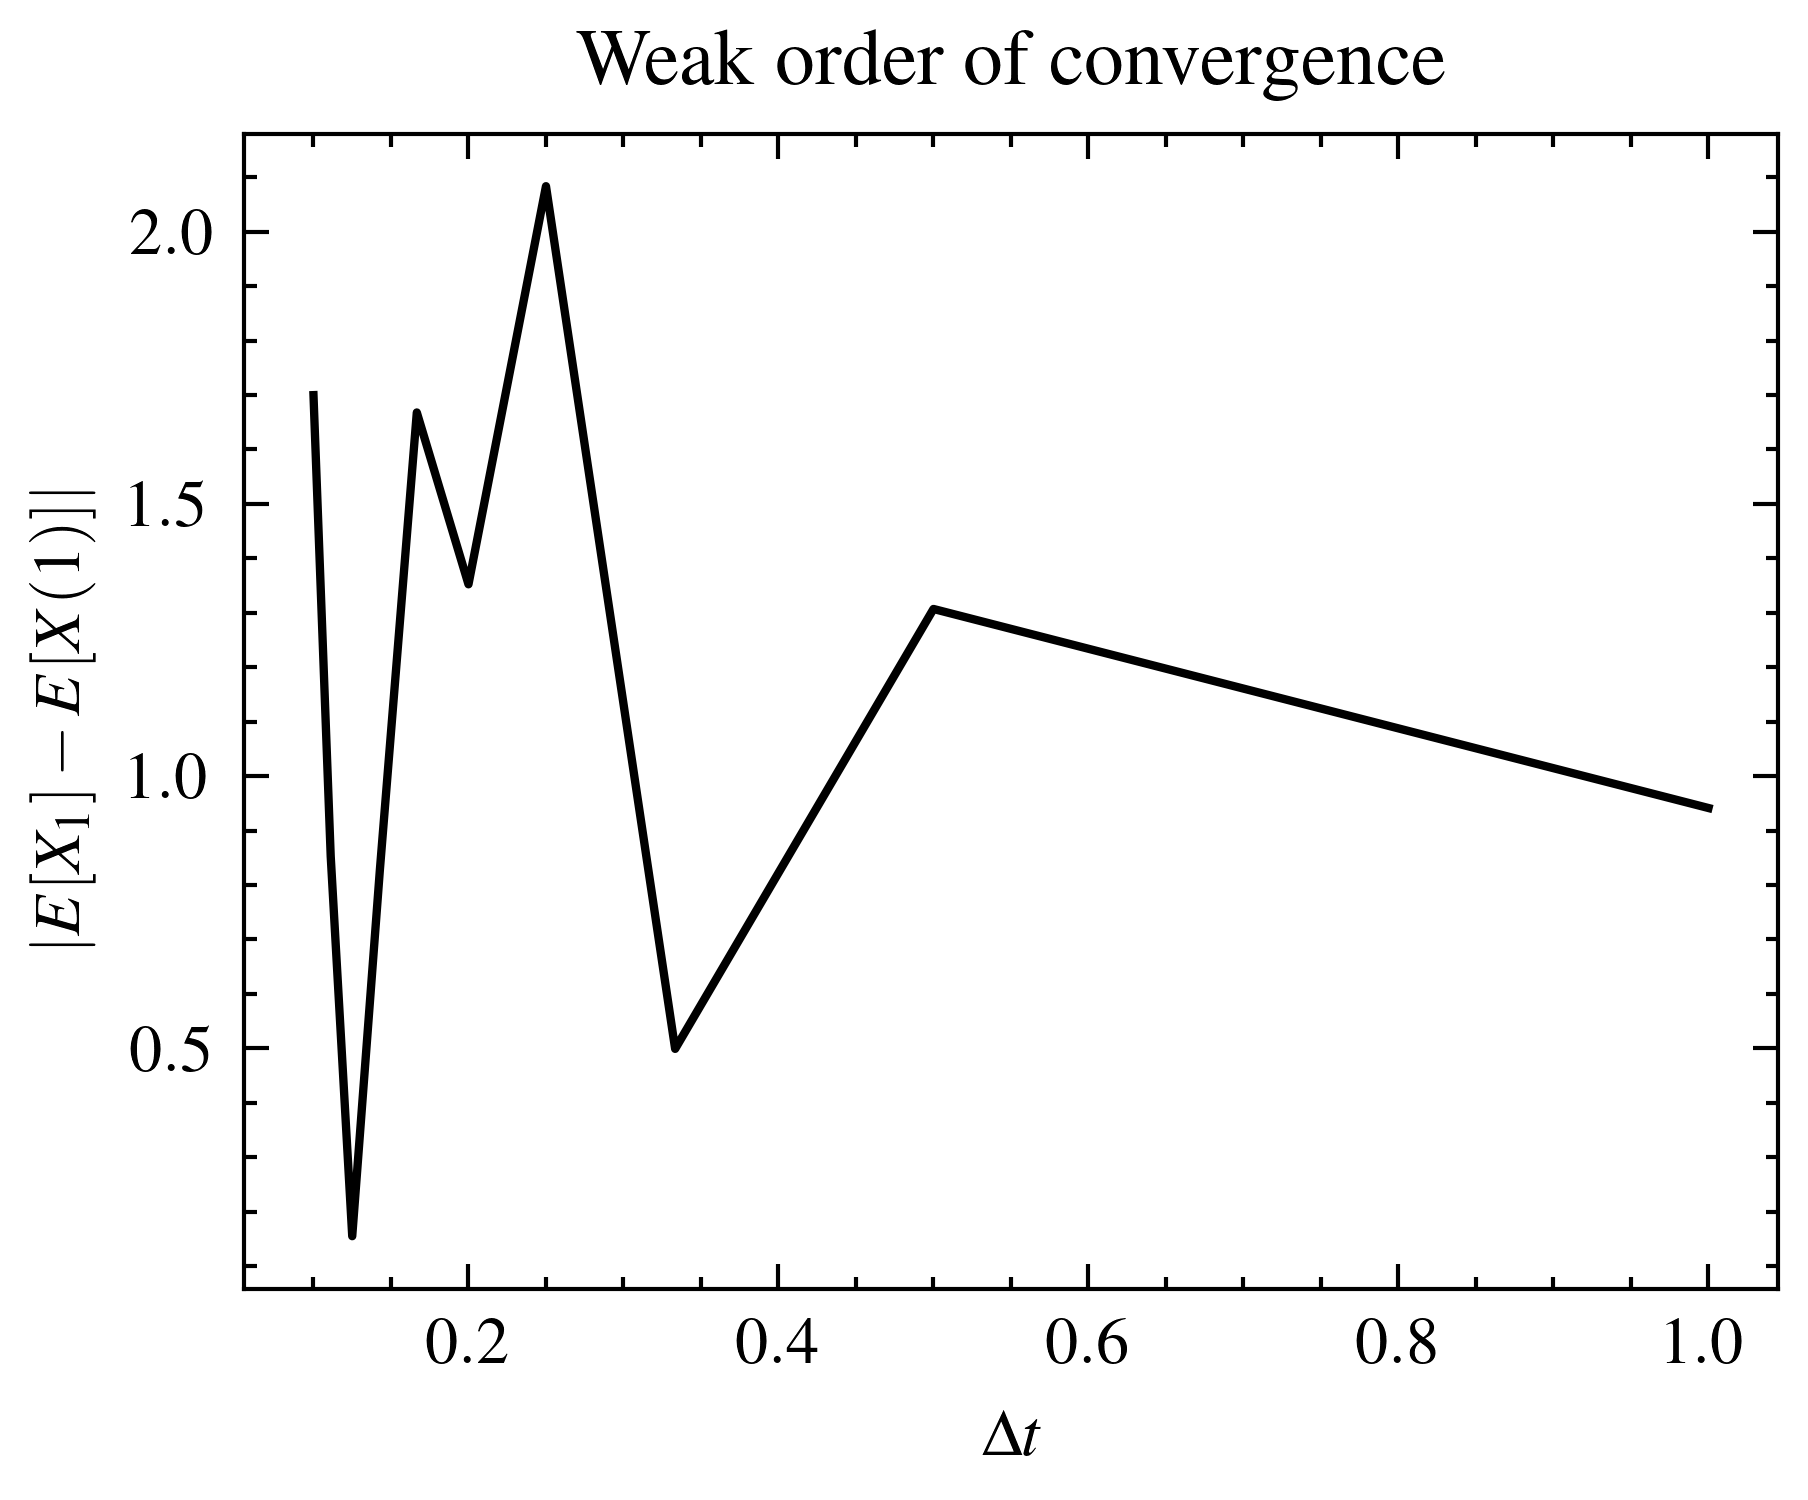

In [11]:
# Consider the following SDE
# 𝑑𝑋(𝑡) = 𝜇𝑋(𝑡)𝑑𝑡 + 𝜎𝑋(𝑡)𝑑𝑊(𝑡) , 𝑋(0) = 3, 𝜇 = 2 , 𝜎 = 0.10
# Where 𝑡 ∈ [0,1]

# a) Show that the Euler Maruyama method has weak order of convergence equal to one. That is
# |𝐸[𝑋1] − 𝐸[𝑋(1)]| = 𝐶Δ𝑡. Here 𝑋(1) is the exact solution at time 1 and 𝑋1 is the computed solution at time
# 1

# Parameters
L = 500000
delta_t = 1 / L
t = np.linspace(0, 1, L + 1)
X = np.zeros(L + 1)
X[0] = 3
mu = 2
sigma = 0.10
for i in range(L):
    dW = np.random.normal(0, np.sqrt(delta_t))
    X[i + 1] = X[i] + mu * X[i] * delta_t + sigma * X[i] * dW

# Exact solution
exact_solution = 3 * np.exp((mu - sigma**2 / 2) * t + sigma * W)
print(f"Expected value: {np.mean(exact_solution)}")
print(f"Computed value: {np.mean(X)}")
print(f"Error: {np.abs(np.mean(exact_solution) - np.mean(X))}")

# Show that the Euler Maruyama method has weak order of convergence equal to one.

# Parameters
n = 10
cdelta_t = np.zeros(n)
# We need to compute |𝐸[𝑋1] − 𝐸[𝑋(1)]| = 𝐶Δ𝑡
for i in range(n):
    L = 5000 * (i + 1)
    delta_t = 1 / L
    t = np.linspace(0, 1, L + 1)
    X = np.zeros(L + 1)
    X[0] = 3
    mu = 2
    sigma = 0.10
    for j in range(L):
        dW = np.random.normal(0, np.sqrt(delta_t))
        X[j + 1] = X[j] + mu * X[j] * delta_t + sigma * X[j] * dW
    cdelta_t[i] = np.abs(np.mean(exact_solution) - np.mean(X))
    
plt.figure()
plt.plot(1 / (np.arange(n) + 1), cdelta_t)
plt.xlabel(r"$\Delta t$")
plt.ylabel(r"$|E[X_1] - E[X(1)]|$")
plt.title("Weak order of convergence")
plt.show()
    


Expected value: 8.621627719127794
Computed value: 10.486287539113114
Error: 1.8646598199853202


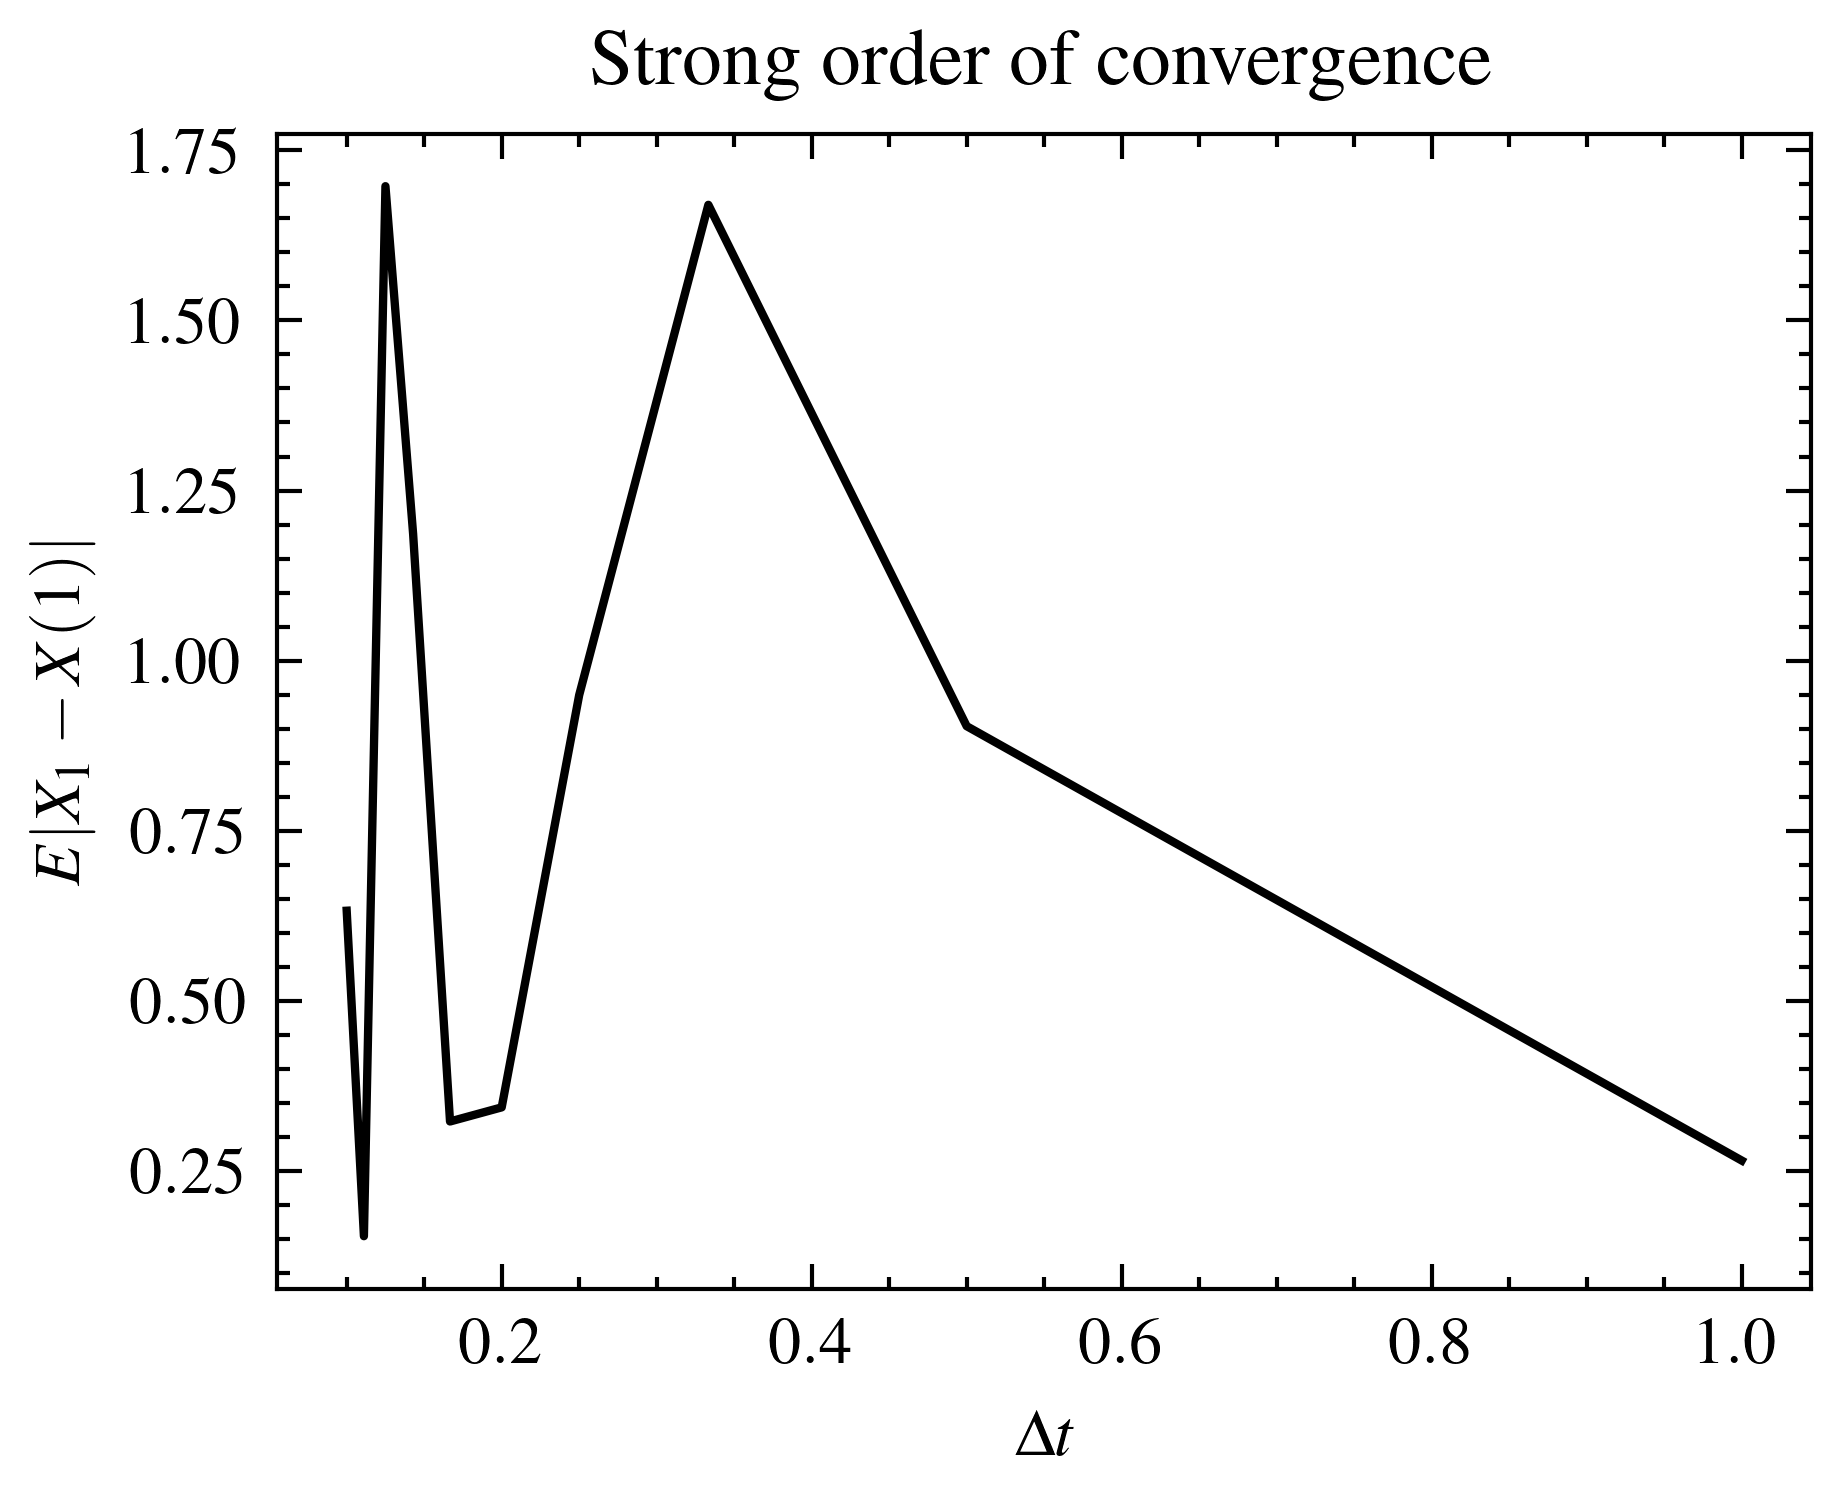

In [12]:
# Show that the Euler Maruyama method has strong order of convergence equal to one half. That is
# 𝐸|𝑋1 − 𝑋(1)| = 𝐶Δ𝑡0.5. Here 𝑋(1) is the exact solution at time 1 and 𝑋1 is the computed solution at time 1.

# Parameters
L = 500000
delta_t = 1 / L
t = np.linspace(0, 1, L + 1)
X = np.zeros(L + 1)
X[0] = 3
mu = 2
sigma = 0.10
for i in range(L):
    dW = np.random.normal(0, np.sqrt(delta_t))
    X[i + 1] = X[i] + mu * X[i] * delta_t + sigma * X[i] * dW
    
# Exact solution
exact_solution = 3 * np.exp((mu - sigma**2 / 2) * t + sigma * W)
print(f"Expected value: {np.mean(exact_solution)}")
print(f"Computed value: {np.mean(X)}")
print(f"Error: {np.abs(np.mean(exact_solution) - np.mean(X))}")

# Show that the Euler Maruyama method has strong order of convergence equal to one half.
 
# Parameters
n = 10
cdelta_t = np.zeros(n)
# We need to compute 𝐸|𝑋1 − 𝑋(1)| = 𝐶Δ𝑡0.5
# half time step

for i in range(n):
    L = 5000 * (i + 1)
    delta_t = 1 / L
    t = np.linspace(0, 1, L + 1)
    X = np.zeros(L + 1)
    X[0] = 3
    mu = 2
    sigma = 0.10
    for j in range(L):
        dW = np.random.normal(0, np.sqrt(delta_t))
        X[j + 1] = X[j] + mu * X[j] * delta_t + sigma * X[j] * dW
    cdelta_t[i] = np.abs(np.mean(exact_solution) - np.mean(X))
    
plt.figure()
plt.plot(1 / (np.arange(n) + 1), cdelta_t)
plt.xlabel(r"$\Delta t$")
plt.ylabel(r"$E|X_1 - X(1)|$")
plt.title("Strong order of convergence")
plt.show()

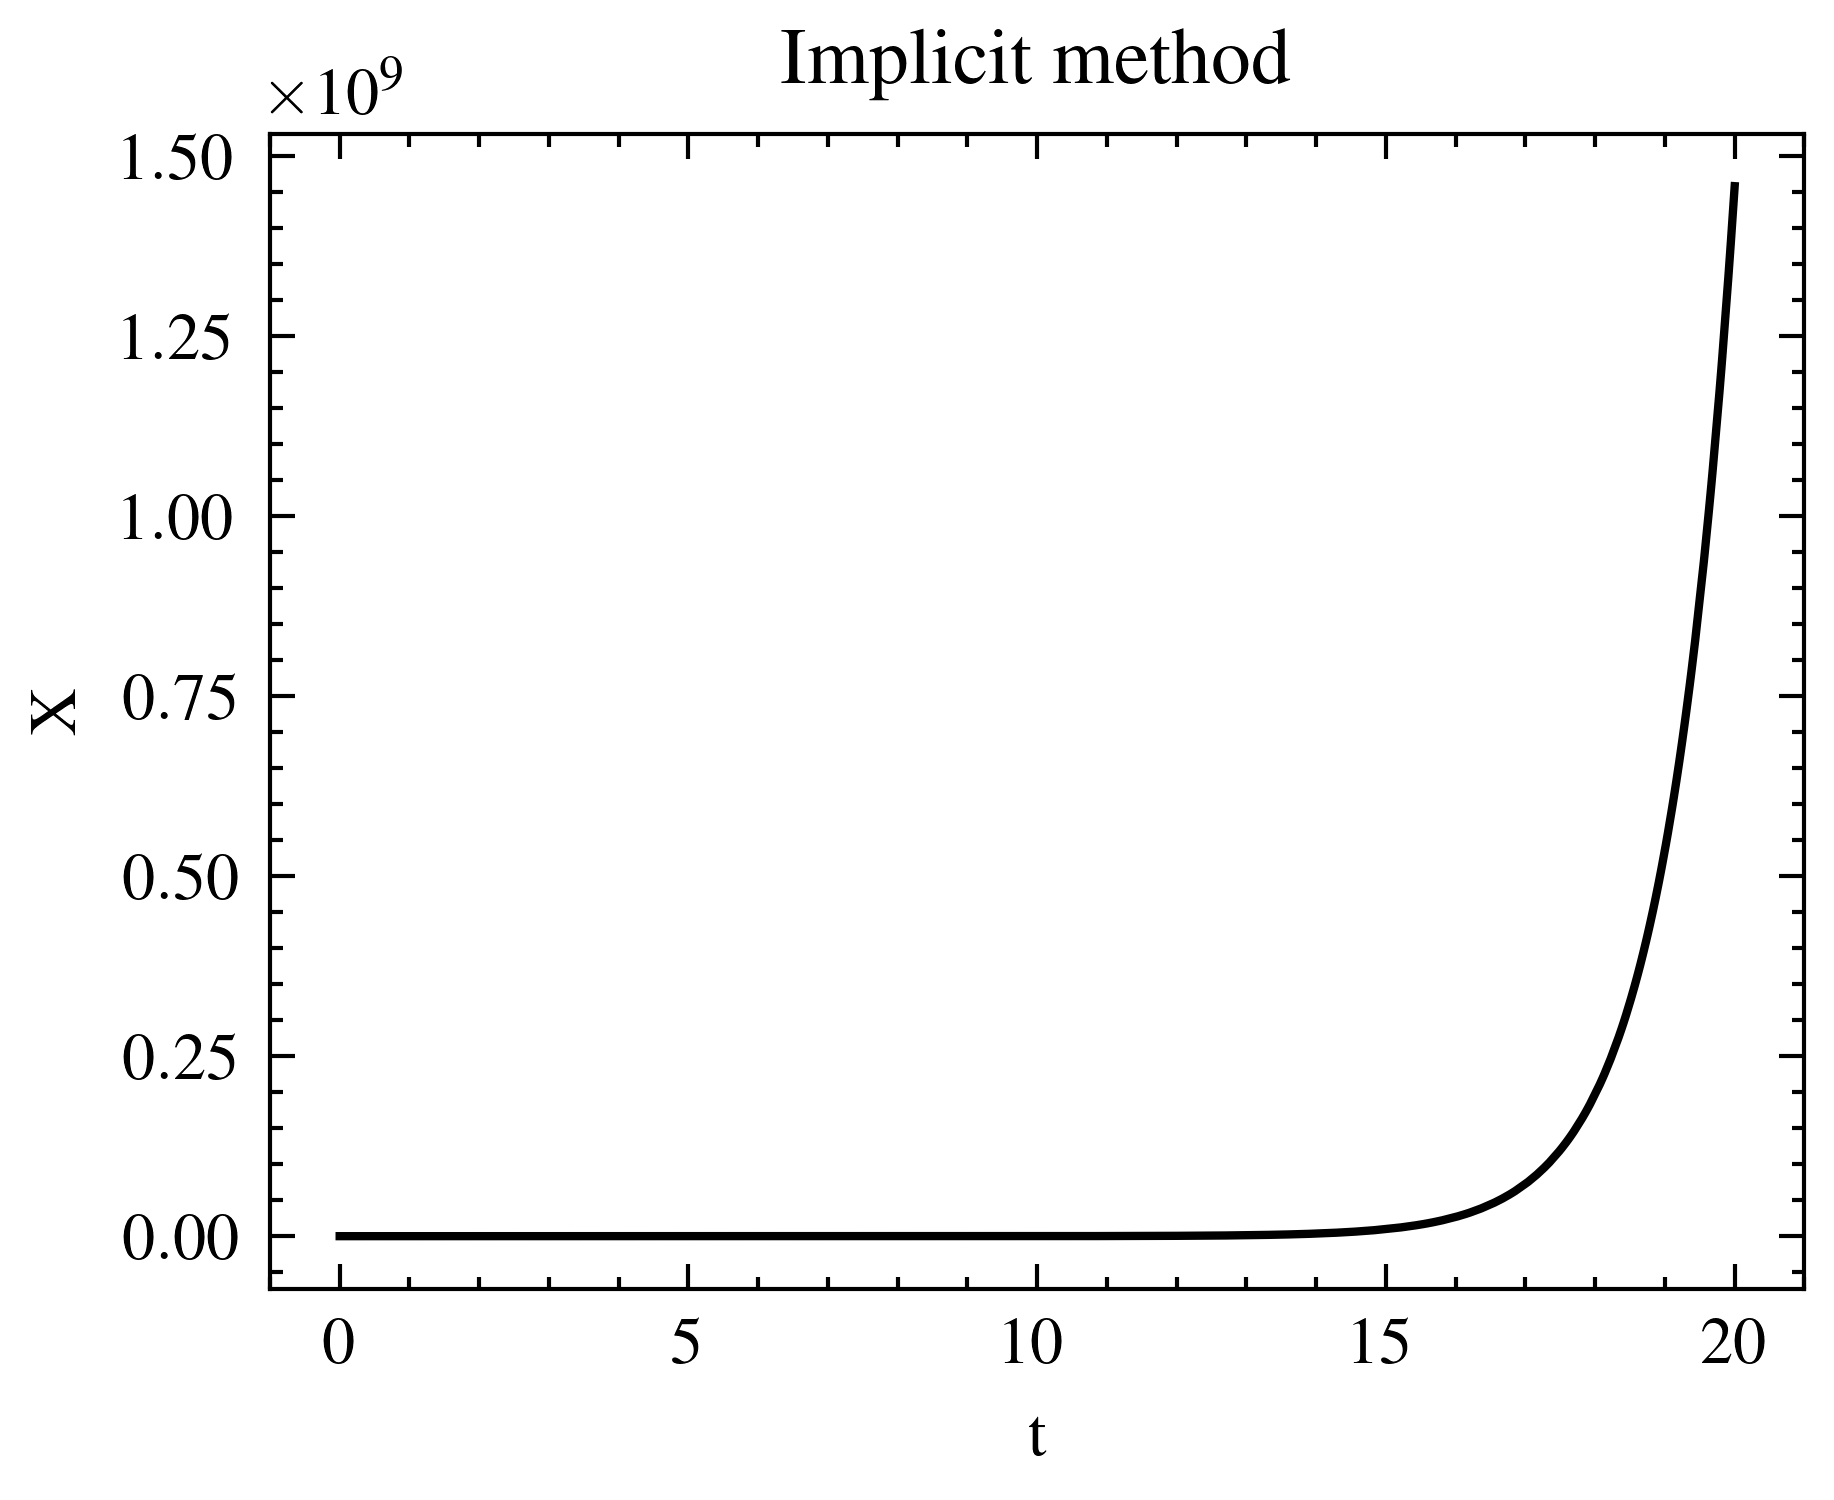

In [13]:
# Consider the following SDE:
# 𝑑𝑋(𝑡) = 𝜇𝑋(𝑡)𝑑𝑡 + 𝜎𝑋(𝑡)𝑑𝑊(𝑡) , 𝑋(0) = 3, 𝜇 = 2 , 𝜎 = 0.10
# Simulate (over the interval [0,20]) this stochastic process using an implicit method of the form
# 𝑋𝑛+1 = 𝑋𝑛 + (1 − 𝜃)𝛥𝑡𝑓(𝑋𝑛) + 𝜃𝛥𝑡𝑓(𝑋𝑛+1) + √𝛥𝑡𝛼𝑛𝑔(𝑋𝑛)

# Parameters
L = 500000
delta_t = 20 / L
t = np.linspace(0, 20, L + 1)
X = np.zeros(L + 1)
X[0] = 3
mu = 2
sigma = 0.10

# Implicit method
theta = 0.5
for i in range(L):
    dW = np.random.normal(0, np.sqrt(delta_t))
    X[i + 1] = X[i] + (1 - theta) * mu * X[i] * delta_t + theta * mu * X[i + 1] * delta_t + np.sqrt(delta_t) * sigma * X[i] * dW
    
plt.figure()
plt.plot(t, X)
plt.xlabel("t")
plt.ylabel("X")
plt.title("Implicit method")
plt.show()

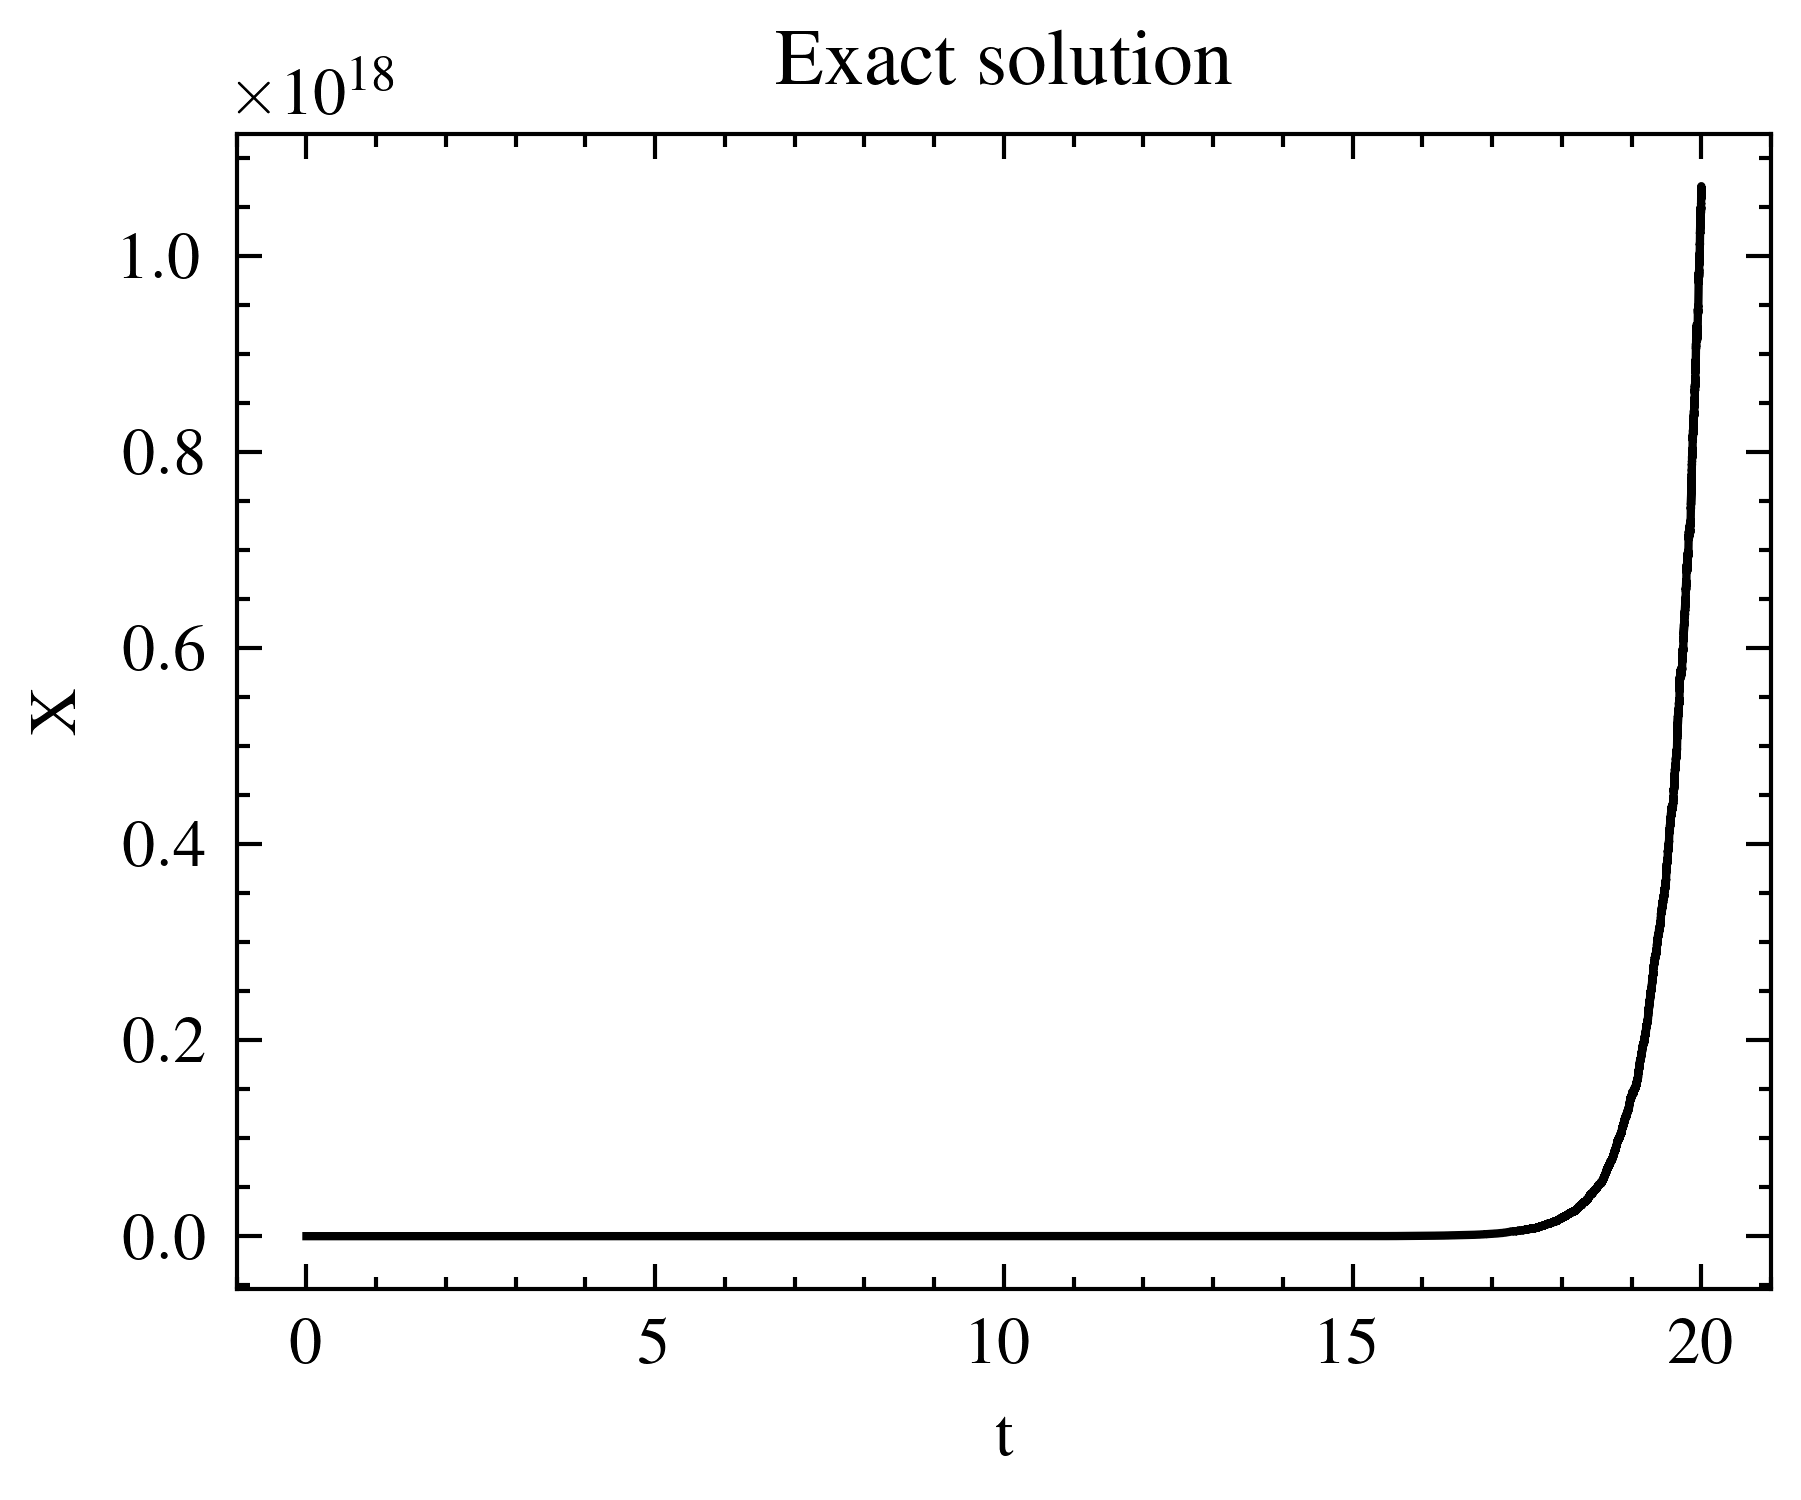

In [14]:
# Compare with the analytical solution
# Exact solution
W = np.zeros(L + 1)
dW = np.zeros(L)
for i in range(L):
    dW[i] = np.random.normal(0, np.sqrt(delta_t))
    W[i + 1] = W[i] + dW[i]
exact_solution = 3 * np.exp((mu - sigma**2 / 2) * t + sigma * W)
plt.figure()
plt.plot(t, exact_solution)
plt.xlabel("t")
plt.ylabel("X")
plt.title("Exact solution")
plt.show()

In [15]:
# Question 4 cont


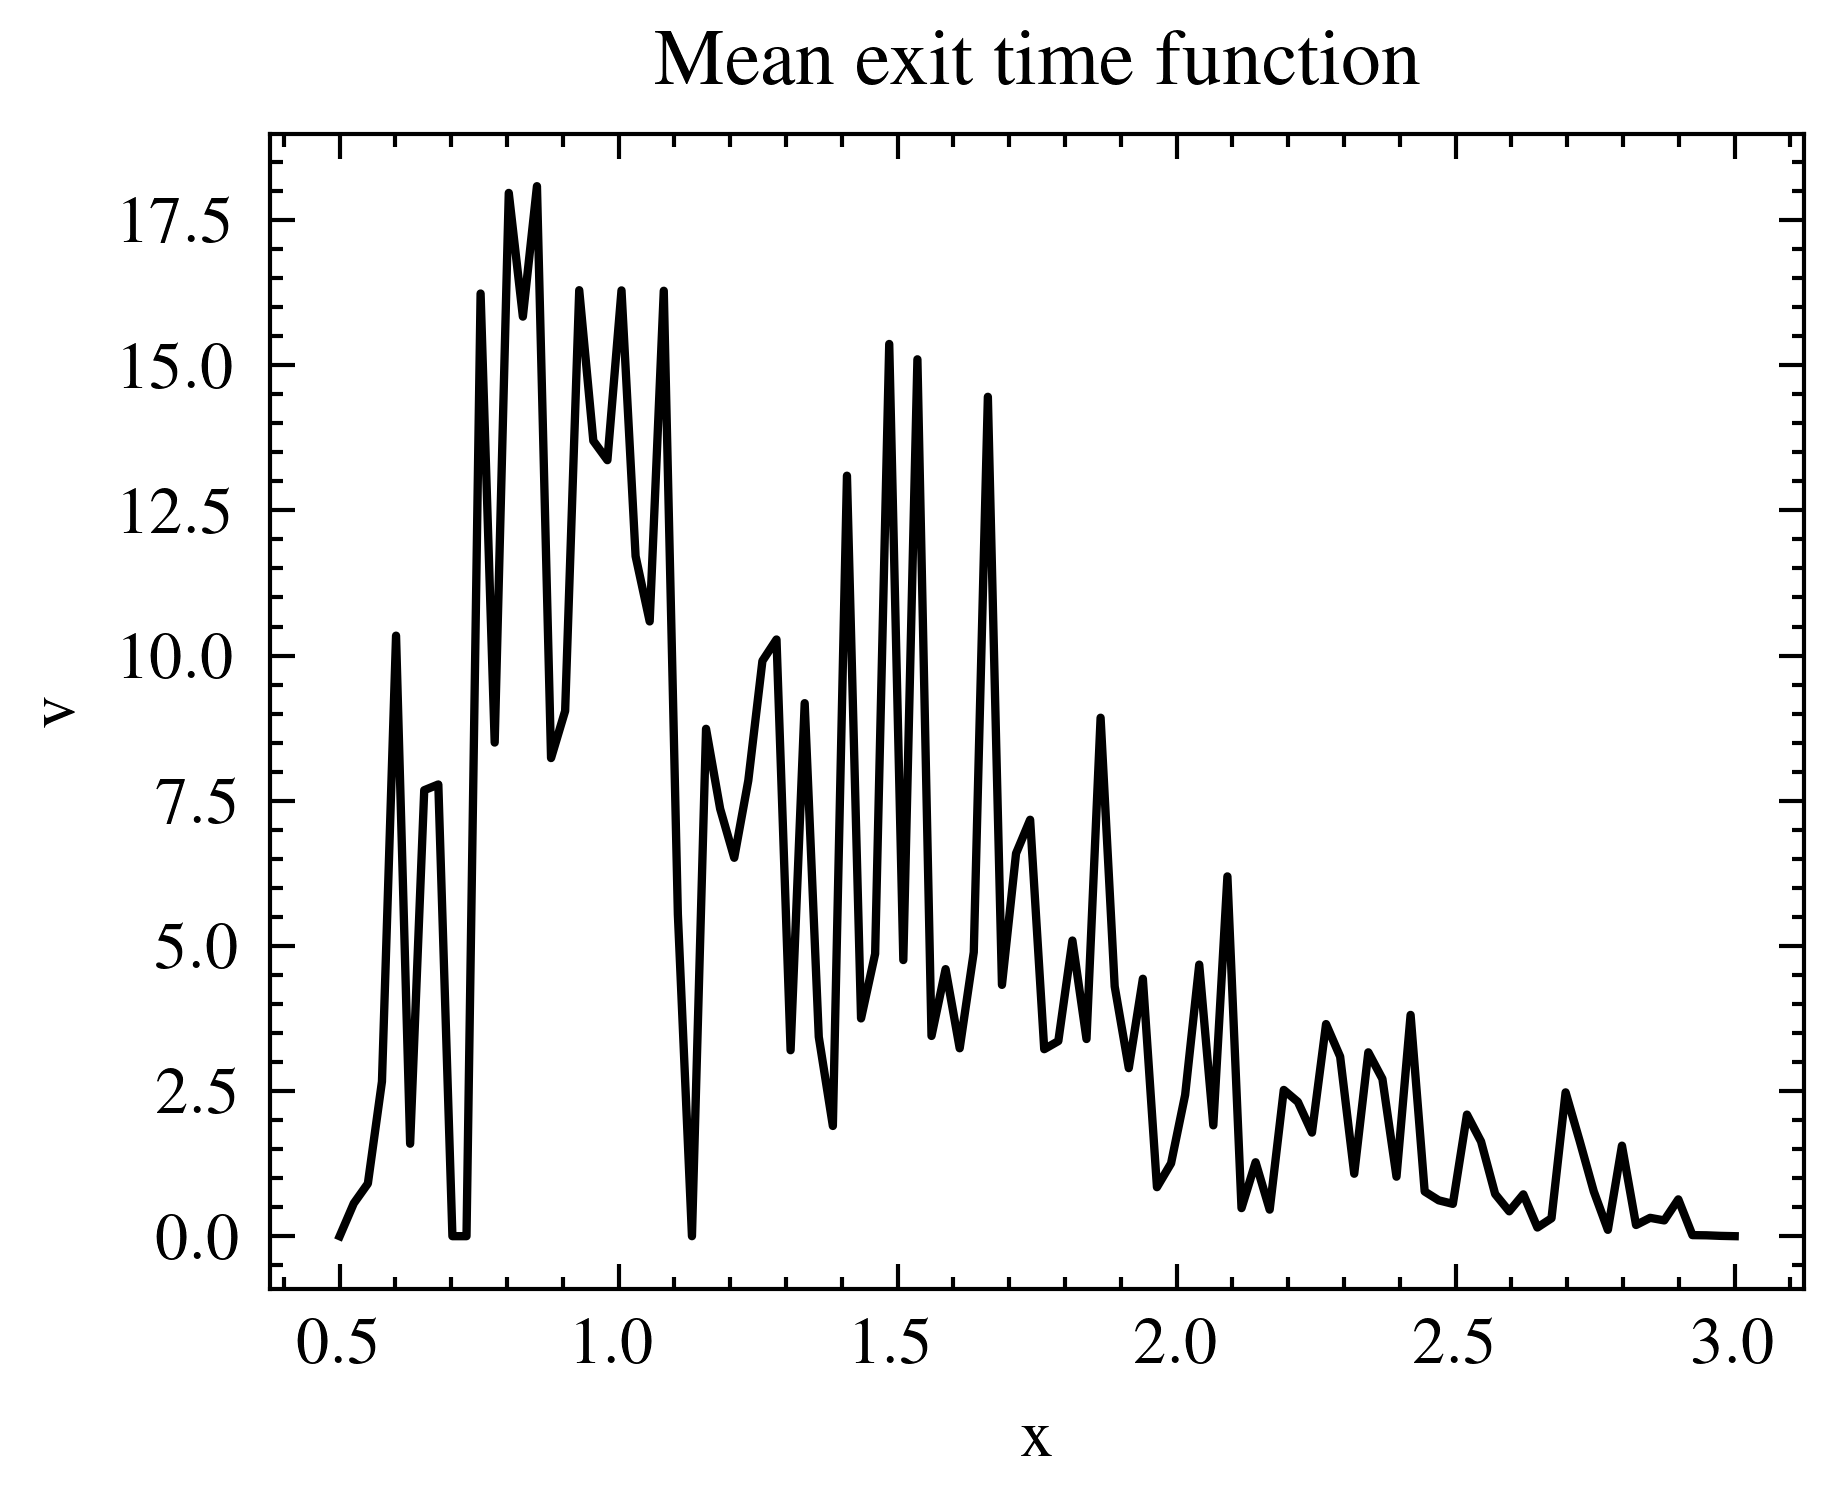

In [18]:
# Consider the following SDE:
# 𝑑𝑋(𝑡) = 𝜇𝑋(𝑡)𝑑𝑡 + 𝜎𝑋(𝑡)𝑑𝑊(𝑡) , 𝑋(0) = 2, 𝜇 = 0.1, 𝜎 = 0.15
# Let 𝑎 = 0.5 𝑎𝑛𝑑 𝑏 = 3.
# Compute the mean exit time function 𝑣(𝑥) for 𝑥 ∈ [0.5, 3]

n = 100
x = np.linspace(0.5, 3, n)
v = np.zeros(n)

#   Mean exit time function
for i in range(n):
    L = 500000
    delta_t = 20 / L
    t = np.linspace(0, 20, L + 1)
    X = np.zeros(L + 1)
    X[0] = x[i]
    mu = 0.1
    sigma = 0.15
    a = 0.5
    b = 3
    for j in range(L):
        dW = np.random.normal(0, np.sqrt(delta_t))
        X[j + 1] = X[j] + mu * X[j] * delta_t + sigma * X[j] * dW
        if X[j + 1] < a or X[j + 1] > b:
            v[i] = t[j]
            break
    
    
plt.figure()
plt.plot(x, v)
plt.xlabel("x")
plt.ylabel("v")
plt.title("Mean exit time function")
plt.show()